Reconhecimento de Padrões

Lista 6: K-Means e PCA

# sk

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('content/quake.csv')

# Verificar as primeiras linhas
print(data.head())

# Garantir que os dados estão no formato correto (latitude e longitude)
X = data.values

   -5.225999999999999801e+01  2.830000000000000071e+01
0                      45.53                    150.93
1                      41.85                    142.78
2                      29.19                    141.15
3                     -21.66                    169.81
4                      23.09                    120.58


In [4]:
best_k = None
best_db_score = float('inf')
best_model = None

# Armazenar os scores para visualização
db_scores = []

# Avaliar k de 4 a 20
for k in range(4, 6):
    best_inertia = float('inf')
    best_kmeans = None

    # Executar o K-médias 20 vezes
    for _ in range(20):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=None, n_init=10, max_iter=300)
        kmeans.fit(X)

        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans

    # Calcular o índice DB para o melhor modelo
    db_score = davies_bouldin_score(X, best_kmeans.labels_)
    db_scores.append(db_score)

    if db_score < best_db_score:
        best_db_score = db_score
        best_k = k
        best_model = best_kmeans

print(f"Melhor k: {best_k} com índice DB: {best_db_score:.2f}")


Melhor k: 5 com índice DB: 0.69


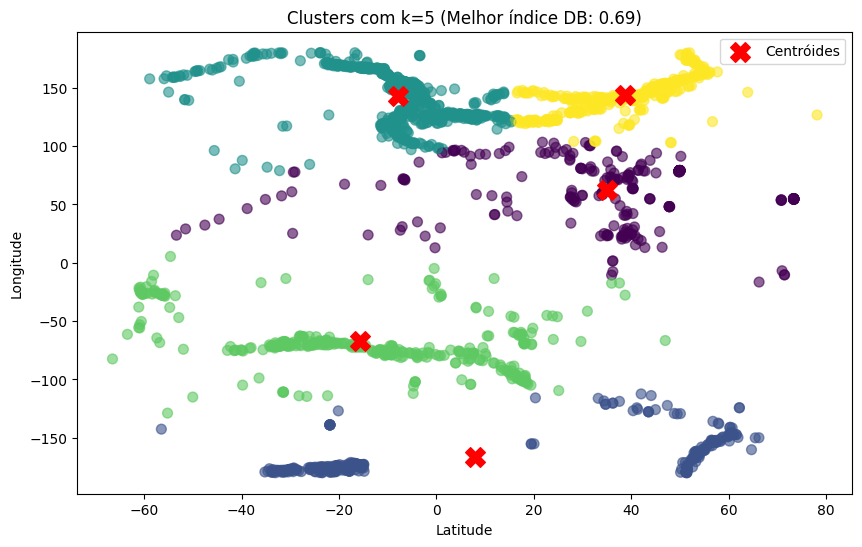

ValueError: x and y must have same first dimension, but have shapes (17,) and (2,)

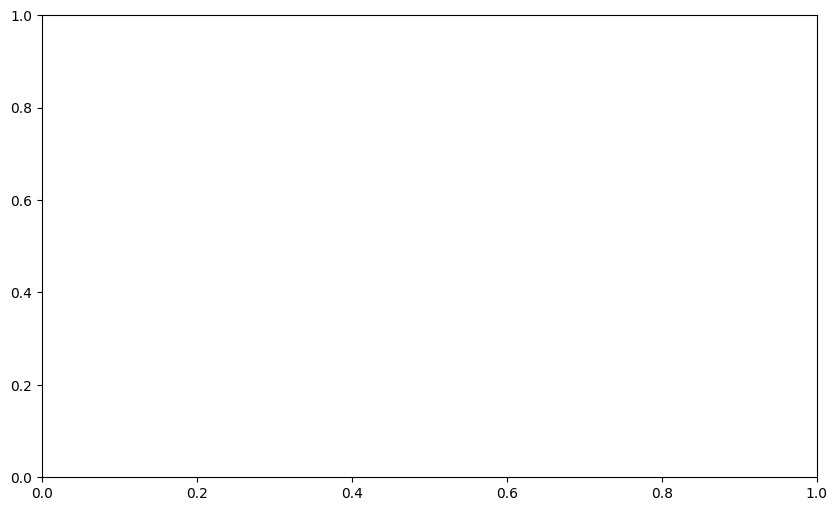

In [12]:
# Plotar os clusters e centróides
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_model.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centróides')
plt.title(f'Clusters com k={best_k} (Melhor índice DB: {best_db_score:.2f})')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Plotar o índice DB para todos os valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(4, 21), db_scores, marker='o')
plt.title('Índice Davies-Bouldin para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice Davies-Bouldin')
plt.xticks(range(4, 21))
plt.grid()
plt.show()

# model

Melhor k: 7 com índice DB: 0.53


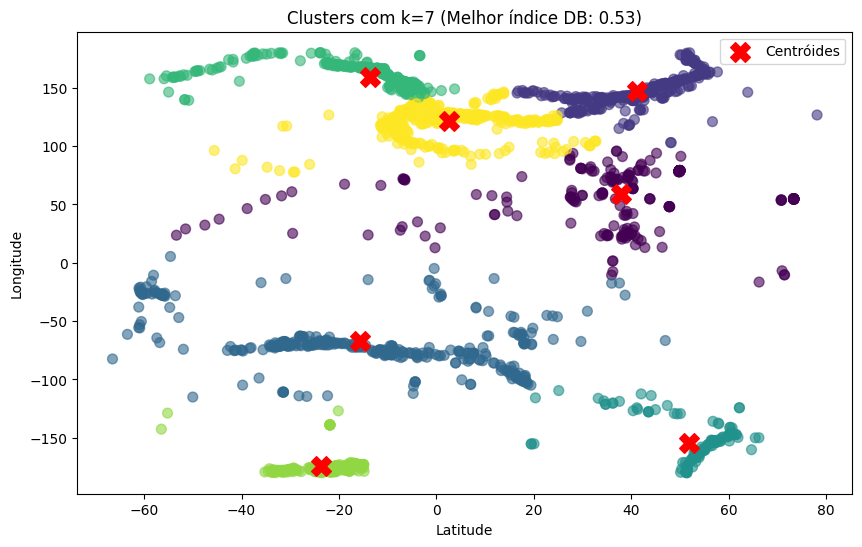

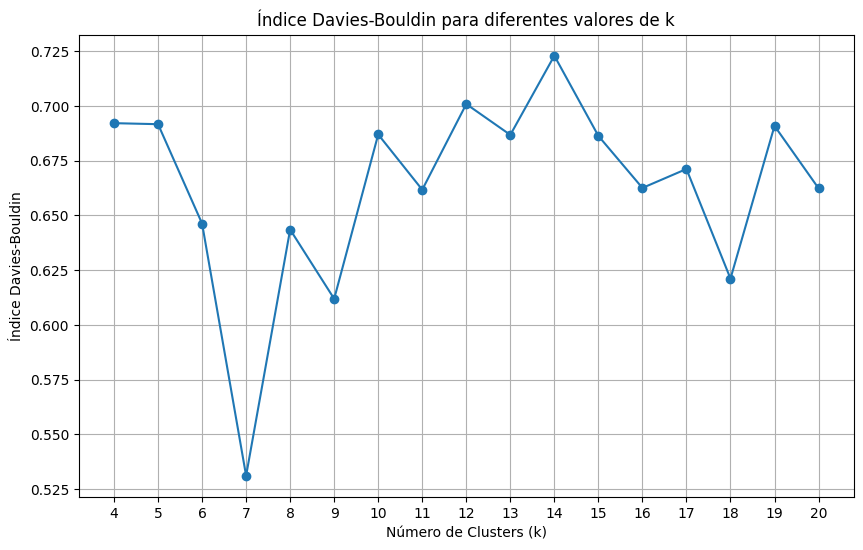

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Carregar os dados
data = pd.read_csv("content/quake.csv").values  # Latitude e Longitude
X = data

# Função para calcular a distância euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Função para implementar o K-médias
def k_means(X, k, max_iter=300, n_restarts=20):
    best_inertia = float('inf')
    best_labels = None
    best_centroids = None

    for _ in range(n_restarts):
        # Passo 1: Inicializar os centróides aleatoriamente
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]

        for _ in range(max_iter):
            # Passo 2: Atribuir cada ponto ao centróide mais próximo
            distances = np.array([euclidean_distance(X, centroid) for centroid in centroids]).T
            labels = np.argmin(distances, axis=1)

            # Passo 3: Atualizar os centróides
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

            # Verificar convergência
            if np.allclose(centroids, new_centroids, rtol=1e-6):
                break
            centroids = new_centroids

        # Calcular o erro de reconstrução (inertia)
        inertia = np.sum([np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k)])
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
            best_centroids = centroids

    return best_labels, best_centroids, best_inertia

# Avaliar o índice DB para diferentes valores de k
db_scores = []
best_db_score = float('inf')
best_k = None
best_labels = None
best_centroids = None

for k in range(4, 21):
    labels, centroids, inertia = k_means(X, k, max_iter=300, n_restarts=20)
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

    if db_score < best_db_score:
        best_db_score = db_score
        best_k = k
        best_labels = labels
        best_centroids = centroids

print(f"Melhor k: {best_k} com índice DB: {best_db_score:.2f}")

# Plotar os clusters para o melhor k
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', s=200, label='Centróides')
plt.title(f'Clusters com k={best_k} (Melhor índice DB: {best_db_score:.2f})')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# Plotar o índice DB para todos os valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(4, 21), db_scores, marker='o')
plt.title('Índice Davies-Bouldin para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice Davies-Bouldin')
plt.xticks(range(4, 21))
plt.grid()
plt.show()
